In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
india_stations_df = pd.read_pickle('../2015-2020-pm25/india_stations.pkl')
india_stations_pm25_list = pd.read_pickle('../2015-2020-pm25/india_stations_pm25.pkl')

In [3]:
import configparser

config = configparser.ConfigParser()
config.read("./config.ini")

city = "Kolkata"

START = config['period']['start_date']
END   = config['period']['end_date']

In [4]:
city_station_ids = india_stations_df[india_stations_df['City'] == city]['StationId'].values

In [5]:
city_stations_pm25_list = []

for df in india_stations_pm25_list:
    if df['StationId'].values[0] in city_station_ids:
        city_stations_pm25_list.append(df)

In [6]:
india_stations_df

,StationName,StationId,City,Latitude,Longitude
0,"Secretariat, Amaravati - APPCB",AP001,Amaravati,16.504561,80.523517
1,"GVM Corporation, Visakhapatnam - APPCB",AP005,Visakhapatnam,17.748887,83.247789
2,"Railway Colony, Guwahati - APCB",AS001,Guwahati,26.179587,91.784315
3,"DRM Office Danapur, Patna - BSPCB",BR005,Patna,25.585624,85.044299
4,"Govt. High School Shikarpur, Patna - BSPCB",BR006,Patna,25.587980,85.094986
...,...,...,...,...,...
122,"Fort William, Kolkata - WBPCB",WB009,Kolkata,22.554246,88.335874
123,"Jadavpur, Kolkata - WBPCB",WB010,Kolkata,22.495500,88.370900
124,"Rabindra Bharati University, Kolkata - WBPCB",WB011,Kolkata,22.584454,88.359384
125,"Rabindra Sarobar, Kolkata - WBPCB",WB012,Kolkata,22.512145,88.363695


In [7]:
# idx = np.random.randint(len(city_stations_pm25_list))
idx = 4
station_df = city_stations_pm25_list[idx][:END]

In [8]:
station_id = station_df['StationId'].values[0]
station_data = india_stations_df[india_stations_df['StationId'] == station_id].values[0]

station_df['Place'] = station_data[0]
station_df['City'] = station_data[1]
station_df['Latitude'] = station_data[3]
station_df['Longitude'] = station_data[4]

<ipython-input-8-ae0d2c0a6eee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['Place'] = station_data[0]
<ipython-input-8-ae0d2c0a6eee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['City'] = station_data[1]
<ipython-input-8-ae0d2c0a6eee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [9]:
station_df.head()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2018-11-06,WB011,167.86,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-07,WB011,271.21,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-08,WB011,238.12,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-09,WB011,222.31,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-10,WB011,197.68,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384


In [10]:
station_df.tail()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2020-03-11,WB011,63.98,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2020-03-12,WB011,71.99,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2020-03-13,WB011,70.70,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2020-03-14,WB011,55.44,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2020-03-15,WB011,22.47,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384


In [11]:
def plot_ts(df, name, columns=['PM2.5']):
    fig = plt.figure(figsize=(18, 4))
    df[columns].plot(c='k', ax=fig.gca())
    plt.title(name)
    plt.ylabel('PM2.5')
    plt.grid(ls='--')
    plt.show()

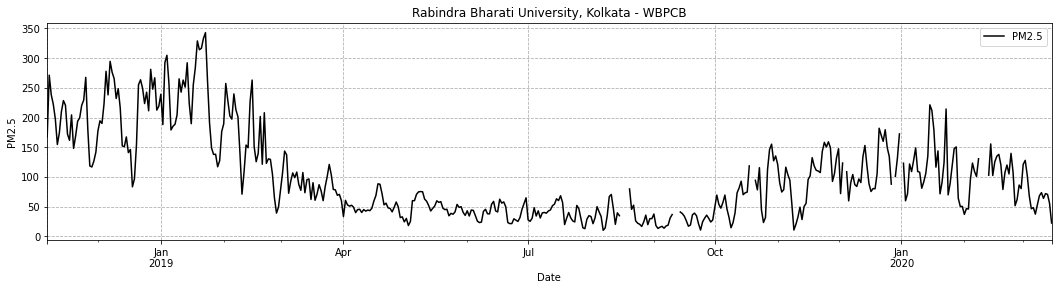

In [12]:
plot_ts(station_df, station_data[0])

In [13]:
station_df[station_df['PM2.5'].isnull()]

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2019-08-16,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-08-17,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-08-18,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-08-19,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-09-11,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-09-12,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-09-13,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-10-19,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2019-10-20,WB011,NaN,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384


In [14]:
def previous_window_impute(station_df, window_length=7):
    column = "PM2.5"
    try:
        for idx, value in enumerate(station_df[column].values):
            if np.isnan(value):
                station_df[column][idx] = station_df[column][idx - window_length]
    except:
        pass
    return station_df

In [15]:
station_df = previous_window_impute(station_df)

<ipython-input-14-c3269d34fd44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df[column][idx] = station_df[column][idx - window_length]
<ipython-input-15-cc740762f2d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df = previous_window_impute(station_df)


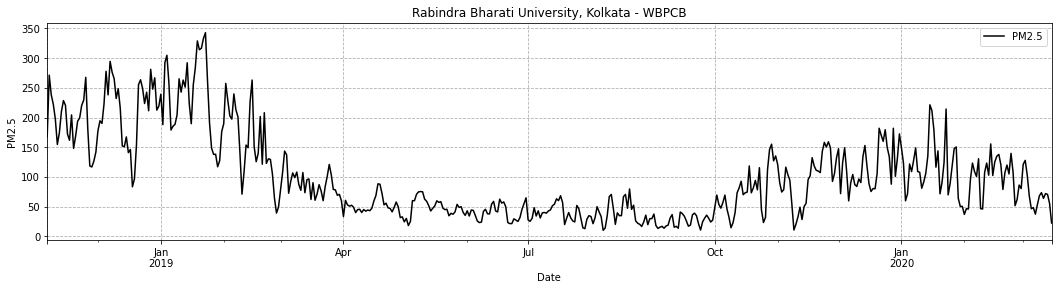

In [16]:
plot_ts(station_df, station_data[0])

In [17]:
station_df[station_df['PM2.5'].isnull()]

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,


In [18]:
station_df.index.freq = 'D'
station_df.head()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2018-11-06,WB011,167.86,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-07,WB011,271.21,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-08,WB011,238.12,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-09,WB011,222.31,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384
2018-11-10,WB011,197.68,"Rabindra Bharati University, Kolkata - WBPCB",WB011,22.584454,88.359384


In [19]:
station_pm25_df = pd.DataFrame(station_df['PM2.5'])

In [20]:
def series_to_supervised(data, col_name='PM2.5', input_length=7, output_length=1, dropnan=True):
    features = 1 if type(data) is list else data.shape[1]
    df_new = pd.DataFrame(data)
    cols, names = list(), list()
    
    for i in range(input_length, 0, -1):
        cols.append(df_new.shift(i))
        names += [('%s(t-%d)' % (col_name, i)) for j in range(features)]
        
    for i in range(0, output_length):
        cols.append(df_new.shift(-i))
        if i == 0:
            names += [('%s(t)' % (col_name)) for j in range(features)]
        else:
            names += [('%s(t+%d)' % (col_name, i)) for j in range(features)]
    df_final = pd.concat(cols, axis=1)
    df_final.columns = names
    if dropnan:
        df_final.dropna(inplace=True)
    return df_final

In [21]:
reframed_df = series_to_supervised(station_pm25_df, input_length=1)
reframed_df.index.freq = 'D'
reframed_df.head()

,PM2.5(t-1),PM2.5(t)
Date,,
2018-11-07,167.86,271.21
2018-11-08,271.21,238.12
2018-11-09,238.12,222.31
2018-11-10,222.31,197.68
2018-11-11,197.68,154.64


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [23]:
X = reframed_df.values[:,:-1]
y = reframed_df.values[:,-1].reshape(-1,1)

In [24]:
ratio = 0.3
random_state = 42
length = X.shape[0]
limit = (int)(ratio * length)

X_train, X_test, y_train, y_test = X[:-limit], X[-limit:], y[:-limit], y[-limit:]
test_idx_values = reframed_df.index.to_pydatetime()[-limit:]

In [25]:
test_idx_values.shape

(148,)

In [26]:
np.random.seed(random_state)

def get_polynomial_reg_model(n=2):
    
    poly_reg = PolynomialFeatures(n)
    X_poly = poly_reg.fit_transform(X_train)

    regressor = LinearRegression()
    regressor.fit(X_poly, y_train)

    y_pred = regressor.predict(poly_reg.transform(X_test))
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return regressor, score, poly_reg, y_pred

def get_linear_reg_model():
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return regressor, score, None, y_pred

def get_decision_tree_reg_model():
    
    regressor = DecisionTreeRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)
    
    y_pred = regressor.predict(X_test)
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return regressor, score, None, y_pred

def get_random_forrest_reg_model():
    
    regressor = RandomForestRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return regressor, score, None, y_pred

def get_svr_reg_model():
    
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    y_train_sc = sc_y.fit_transform(y_train)
    
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train_sc, y_train_sc)
    
    y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
    score = {
        "r2_score": r2_score(y_test, y_pred),
        "mae": mean_absolute_error(y_test, y_pred), 
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mean": np.mean(y_test)
    }
    
    return regressor, score, (sc_X, sc_y), y_pred

In [27]:
MODEL_LIST = [
    ('Polynomial', get_polynomial_reg_model),
    ('Linear', get_linear_reg_model),
    ('Decision Tree', get_decision_tree_reg_model),
    ('Random Forrest', get_random_forrest_reg_model),
    ('SVR', get_svr_reg_model)
]

In [28]:
best = {}
best_score = 9e9

rows = []

predictions = {}
predictions['Actual'] = y_test.reshape(-1)

for name, model_fn in MODEL_LIST:
    regressor, score, scaler, y_pred = model_fn()
    row = [f"{name} Regression", score['mae'], score['rmse'], score['r2_score'], score['mean']]
    rows.append(row)
    
    predictions[name + " Regression"] = y_pred.reshape(-1)
    
    if score['rmse'] < best_score:
        best['station_name'] = station_data[0]
        best['name'] = name + " Regression"
        best['regressor'] = regressor
        best['scaler'] = scaler
        best['score'] = score       
        best['test_set_predictions'] = y_pred
        
        best_score = score['rmse']

model_dfs = pd.DataFrame(rows, columns=["model", "mae", "rmse", "r2_score", "mean"])
model_dfs

<ipython-input-26-ee06ea291d31>:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)
/home/pritthijit/.mlenv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,model,mae,rmse,r2_score,mean
0,Polynomial Regression,26.548923,35.506690,0.271747,102.808378
1,Linear Regression,26.057031,34.831042,0.299199,102.808378
2,Decision Tree Regression,38.433378,50.245078,-0.458306,102.808378
3,Random Forrest Regression,33.784619,44.224545,-0.129766,102.808378
4,SVR Regression,28.086328,37.466442,0.189139,102.808378


In [29]:
print("Best Model: ", best['name'])
print("Score: ", best['score'])

Best Model:  Linear Regression
Score:  {'r2_score': 0.29919909196092, 'mae': 26.057030919562724, 'rmse': 34.83104228740264, 'mean': 102.80837837837838}


In [30]:
import datetime

test_idx_values += datetime.timedelta(days=1)

In [31]:
predictions_df = pd.DataFrame(predictions, index=test_idx_values)

In [32]:
predictions_df

,Actual,Polynomial Regression,Linear Regression,Decision Tree Regression,Random Forrest Regression,SVR Regression
2019-10-21,81.52,77.161756,74.498372,81.52,81.4972,72.222432
2019-10-22,94.32,85.627592,82.235206,92.77,81.8875,80.641066
2019-10-23,78.31,98.644298,94.297505,96.65,90.4316,93.854213
2019-10-24,115.61,82.328435,79.210208,69.14,80.3267,77.349121
2019-10-25,44.62,119.803129,114.360502,126.68,122.2200,117.047637
...,...,...,...,...,...,...
2020-03-12,63.98,77.451985,74.762235,95.42,88.5001,72.509537
2020-03-13,71.99,67.430170,65.706087,39.19,45.4454,62.670896
2020-03-14,70.70,75.792102,73.254448,53.03,62.5046,70.868980
2020-03-15,55.44,74.451295,72.038794,60.03,64.1208,69.546474


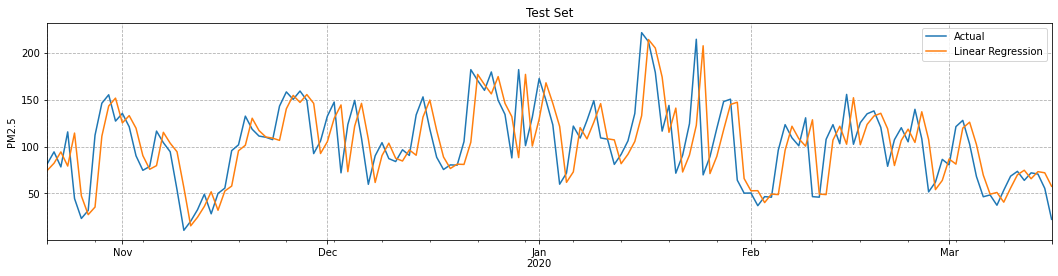

In [33]:
fig = plt.figure(figsize=(18, 4))
predictions_df[['Actual', best['name']]].plot(ax=fig.gca())
plt.title("Test Set")
plt.ylabel('PM2.5')
plt.grid(ls='--')

In [34]:
import pickle

with open("best_pm25_reg_model_ml.pkl", "wb") as file:
    pickle.dump(best, file, protocol=4)

In [35]:
train_df = pd.DataFrame(X_train, index=reframed_df.index.to_pydatetime()[:-limit])
train_df.columns = ['Actual']

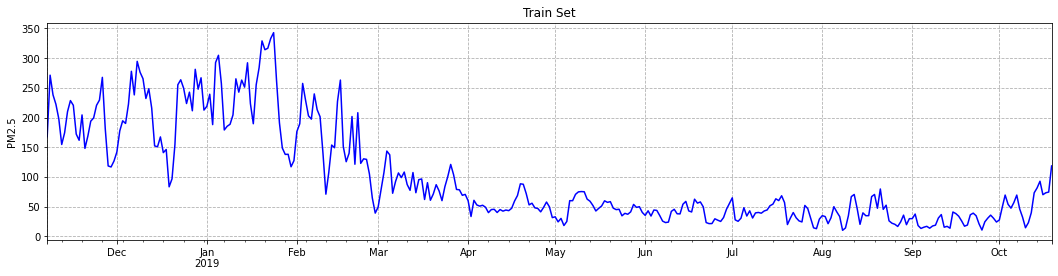

In [36]:
fig = plt.figure(figsize=(18, 4))
train_df['Actual'].plot(ax=fig.gca(), c="blue")
plt.title("Train Set")
plt.ylabel('PM2.5')
plt.grid(ls='--')

plt.savefig("./rep-train.png", bbox='tight', dpi=300)

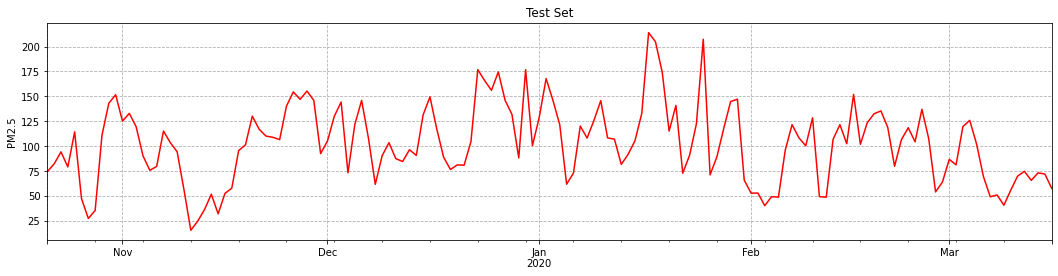

In [37]:
fig = plt.figure(figsize=(18, 4))
predictions_df[best['name']].plot(ax=fig.gca(), c="red")
plt.title("Test Set")
plt.ylabel('PM2.5')
plt.grid(ls='--')

plt.savefig("./rep-test.png", bbox='tight', dpi=300)